In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

# Problem 1

### Consider the system below 
$$
\begin{align}
 \cos(x_0) - x_1 = 0 \\
0.2 x_0 - x_1 -0.1  =0
\end{align}
$$
### Remark: this example is quite artificial... you could easily reduce it to one equation with one unknown. But we are going to pretend we didn't notice it. The reason I am doing this is so that we can do some visualization and debugging. 

### a) What are the two functions that you should plot in order to visualize the solutions of this non-linear system? Plot these two functions. How many solutions? Get  very rough initial guesses for each solutions.

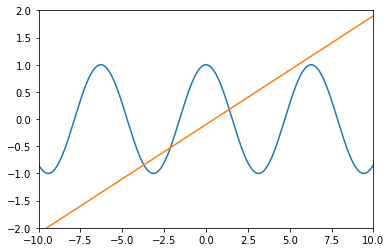

In [2]:
x = np.arange(-10,10,0.01)
y = np.cos(x)
plt.plot(x,y)

xx = np.arange(-10,10,0.001)
yy = 0.2*xx -0.1
plt.plot(xx,yy)

plt.xlim(-10,10)
plt.ylim(-2,2)

plt.show()

### b) write 3 Newton solvers with three different stopping criteria. The first solver should stop when a given number of iteration is reached. The second solver should stop when to successive iterate are within TOL of one another, that is
$$
\text{stopping criteria:} \qquad \|x^{(k)} - x^{(k-1)} \| < TOL
$$
### The last solver shouls stop when the vector F(x) is within TOL of the zero vector, that is
$$
\text{stopping criteria:} \qquad \|F(x^{(k)}) \| < TOL
$$

In [3]:
def newton1(F,DF,x0,num_iter):
    """
    Solve F(x)=0 with Newton's method.
    The algo stop after num_iter iterations
    
    INPUTS 
    F (function): the input and output of this function are 1d-arrays
    DF (function): Jacobian matrix of F. The input is a 1d-array 
                  and the output is a 2d-array.
    x0 (1d-array): initial guess
    num_iter (int): number of iterations
    
    OUTPUT
    x (1d-array): solution of the system
    """
    x = x0
    for i in range(0,num_iter):
        y = linalg.solve(DF(x),-F(x))
        x = x+y
        print(x)
    return x

In [4]:
def newton2(F,DF,x0,TOL):
    """
    Solve F(x)=0 with Newton's method.
    The algo stop when ||x^k-x^(k-1)|| < TOL
    
    INPUTS 
    F (function): the input and output of this function are 1d-arrays
    DF (function): Jacobian matrix of F. The input is a 1d-array 
                  and the output is a 2d-array.
    x0 (1d-array): initial guess
    TOL (float): tolerance for the stopping criteria 
    """
    d = x0.shape[0]
    x = x0
    y = np.ones( (d,) )
    while linalg.norm(y)> TOL:
        y = linalg.solve(DF(x),-F(x))
        x = x+y
        print(x)
    return x

In [5]:
def newton3(F,DF,x0,TOL):
    """
    Solve F(x)=0 with Newton's method.
    The algo stop when ||F(x)||<TOL
    
    INPUTS 
    F (function): the input and output of this function are 1d-arrays
    DF (function): Jacobian matrix of F. The input is a 1d-array 
                  and the output is a 2d-array.
    x0 (1d-array): initial guess
    TOL (float): tolerance for the stopping criteria |
    """
    x = x0
    while linalg.norm(F(x))> TOL:
        y = linalg.solve(DF(x),-F(x))
        x = x+y
        print(x)
    return x

### c) Try your three version of Newton's method with the three different stopping criteria on the above problem. There are multiple solutions. Make sure to find all solutions by trying different initial guesses (use the plots to decide on appropriate initial guesses). Use a tolerance of $10^{-8}$ for the two more sophisticated stopping criteria. How many iterations are required?

In [6]:
def F(x):
    y0 = np.cos(x[0]) - x[1] 
    y1 = 0.2*x[0] - x[1] - 0.1 
    y = np.array([y0,y1])
    return y

In [7]:
def DF(x):
    df0dx0 = -np.sin(x[0])
    df0dx1 = -1
    df1dx0 = 0.2
    df1dx1 = -1
    jacobian = np.array( [ [df0dx0,df0dx1],[df1dx0,df1dx1]])
    return jacobian

In [8]:
x0 = np.array([1,0])
#x0 = np.array([-2.5,-0.5])
#x0 = np.array([-5,-1])

newton1(F,DF,x0,5)

[1.42276963 0.18455393]
[1.39159618 0.17831924]
[1.39153144 0.17830629]
[1.39153144 0.17830629]
[1.39153144 0.17830629]


array([1.39153144, 0.17830629])

In [9]:
newton2(F,DF,x0,1e-8)

[1.42276963 0.18455393]
[1.39159618 0.17831924]
[1.39153144 0.17830629]
[1.39153144 0.17830629]


array([1.39153144, 0.17830629])

In [10]:
newton3(F,DF,x0,1e-8)

[1.42276963 0.18455393]
[1.39159618 0.17831924]
[1.39153144 0.17830629]


array([1.39153144, 0.17830629])

### c) Try with initial guess (10,0), do 100 iterations. What is happening? What is the problem there? 

In [11]:
x0 = np.array([10,0])
newton1(F,DF,x0,100)

[17.96192862  3.49238572]
[22.93282897  4.48656579]
[31.27234479  6.15446896]
[-59.47902622 -11.99580524]
[-1199.25709115  -239.95141823]
[-942.94816056 -188.68963211]
[-1691.65524717  -338.43104943]
[-2117.07771536  -423.51554307]
[-1342.92089509  -268.68417902]
[-1117.97664834  -223.69532967]
[-754.05457011 -150.91091402]
[435.23943059  86.94788612]
[362.1710359   72.33420718]
[488.90490426  97.68098085]
[622.94034062 124.48806812]
[497.36492338  99.37298468]
[402.13962721  80.32792544]
[34.48337888  6.79667578]
[6.04589854 1.10917971]
[9.95849891 1.89169978]
[18.87414697  3.67482939]
[6.9628917  1.29257834]
[6.34155091 1.16831018]
[5.683434  1.0366868]
[6.26298732 1.15259746]
[5.41316218 0.98263244]
[6.01177518 1.10235504]
[8.05261511 1.51052302]
[6.60569557 1.22113911]
[6.07818387 1.11563677]
[44.35009958  8.77001992]
[30.34477357  5.96895471]
[38.444831   7.5889662]
[30.64248167  6.02849633]
[41.29820403  8.15964081]
[78.76849436 15.65369887]
[701.75721044 140.25144209]
[895.62746

array([-444967.06143262,  -88993.51228652])

# Problem 2

### The system below has two solutions. Find these two solutions with Newton's method. Then plug them back to double check.
$$
\begin{align}
x_0^2-x_1^2+2x_1 = 0 \\
2x_0 + x_1^2 - 6 =0
\end{align}
$$
### Note that here we are quite blind when choosing our initial guess because we don't have any visual; but that's fine, just try various initial guesses. 

In [12]:
def F(x):
    y0 = x[0]**2 - x[1]**2 + 2*x[1]
    y1 = 2*x[0] + x[1]**2 - 6
    y = np.array([y0,y1])
    return y

In [13]:
def DF(x):
    df1dx1 = 2*x[0]
    df1dx2 = -2*x[1]+2
    df2dx1 = 2.
    df2dx2 = 2*x[1]
    jacobian = np.array( [ [df1dx1,df1dx2],[df2dx1,df2dx2]])
    return jacobian

In [14]:
x0 = np.array([0,0])
newton1(F,DF,x0,10)

[3. 0.]
[ 3.  -4.5]
[ 2.46710526 -2.36842105]
[ 2.18397176 -1.52875578]
[ 2.11344873 -1.34429476]
[ 2.10952312 -1.33455931]
[ 2.10951192 -1.33453219]
[ 2.10951192 -1.33453219]
[ 2.10951192 -1.33453219]
[ 2.10951192 -1.33453219]


array([ 2.10951192, -1.33453219])

In [15]:
F([ 2.10951192 , -1.33453219])

array([-5.52410917e-09,  6.14619644e-09])

In [16]:
x0 = np.array([1,1])
newton1(F,DF,x0,10)

[0.  3.5]
[0.55 2.45]
[0.61458892 2.19863718]
[0.62517978 2.17945143]
[0.62520409 2.17935583]
[0.6252041  2.17935582]
[0.6252041  2.17935582]
[0.6252041  2.17935582]
[0.6252041  2.17935582]
[0.6252041  2.17935582]


array([0.6252041 , 2.17935582])

In [17]:
F([0.6252041, 2.17935582])

array([ 1.64889373e-08, -9.83212711e-09])

# Problem 3 \[very important!!\]
### Consider the system below: 
$$
\begin{align}
x_0 + 2x_1 -2 = 0 \\
x_0 + x_1 -3 =0
\end{align}
$$
### a) Is this a linear or nonlinear system?
### b) Use linalg.solve() to solve it. Check by hand it is the correct solution by plugging it back in the system.

In [18]:
A = np.array([[1,2],[1,1]])
b = np.array([2,3])
linalg.solve(A,b)

array([ 4., -1.])

### c) Use Newton's method to method to find the solution. How many iterates are needed?

In [19]:
def F(x):
    y0 = x[0]+2*x[1] - 2 
    y1 = x[0] + x[1] - 3
    y = np.array([y0,y1])
    return y

In [20]:
def DF(x):
    df1dx1 = 1
    df1dx2 = 2
    df2dx1 = 1
    df2dx2 = 1
    jacobian = np.array( [ [df1dx1,df1dx2],[df2dx1,df2dx2]])
    return jacobian

In [21]:
x0 = np.array([1,1])
newton1(F,DF,x0,5)

[ 4. -1.]
[ 4. -1.]
[ 4. -1.]
[ 4. -1.]
[ 4. -1.]


array([ 4., -1.])

### d) Explain very precisely what is happening and why we need this specific number of iterations.

In this problem we have $F(x) = Ax-b$ where 
$$
A = \begin{bmatrix}
1 & 2 \\
1 & 1
\end{bmatrix} \quad \text{and} \quad 
b = \begin{bmatrix}
2 \\
 3
\end{bmatrix}
$$
As you have computed, the Jacobian matrix is $DF(x^{(0)})=A$.

Recall that the idea behind Newton's method is to replace the nonlinear system of equation $$F(x)=0$$ by the linear system  $$ F(x^{(0)}) + DF(x^{(0)}) (x-x^{(0)})=0$$ 

But since $DF(x^{(0)})=A$ and $F(x^{(0)}) = Ax^{(0)}-b$, the above equation is equivalent to:
$$ (Ax^{(0)}-b) + A (x-x^{(0)})=0$$ 
which is equivalent $Ax = b$ due to the cancellation of the terms $Ax^{(0)}$. 

# Problem 4

### The nonlinear system 
\begin{align}
& 3x_0 - \cos(x_1x_2) - \frac{1}{2} = 0 \\
& x_0^2 - 81(x_1+0.1)^2+\sin(x_2) +1.06 = 0\\
& e^{-x_0x_1}+20x_2+ \frac{10\pi - 3}{3} = 0
\end{align}
### has a solution (0.5, 0, -0.52359877). Use Newton's method with initial guess (0.1,0.1,-0.1) to recover this solution.

In [22]:
def F(x):
    
    y0 = 3*x[0]-np.cos(x[1]*x[2])-0.5
    y1 = x[0]**2 - 81*(x[1]+0.1)**2 + np.sin(x[2]) + 1.06
    y2 = np.exp(-x[0]*x[1]) + 20*x[2] + (10*np.pi - 3)/3
    
    y = np.array([y0,y1,y2])
    
    return y

In [23]:
def DF(x):
    
    # 1st row
    a0 = 3
    b0 = np.sin(x[1]*x[2]) * x[2]
    c0 = np.sin(x[1]*x[2]) * x[1]
    
    # 2nd row
    a1 = 2*x[0]
    b1 = - 2*81*(x[1]+0.1)
    c1 = np.cos(x[2])
    
    # 3rd row
    a2 = -x[1] * np.exp(-x[0]*x[1])
    b2 = -x[0] * np.exp(-x[0]*x[1])
    c2 = 20
    
    jacobian = np.array([ [a0,b0,c0],
                          [a1,b1,c1],
                          [a2,b2,c2]  ])
    
    return jacobian

In [24]:
x0 = np.array([.1,.1,-.1])
xstar  = newton2(F,DF,x0,1e-8)

[ 0.49986967  0.01946685 -0.52152047]
[ 0.50001424  0.00158859 -0.52355696]
[ 5.00000113e-01  1.24447833e-05 -5.23598450e-01]
[ 5.00000000e-01  7.75785717e-10 -5.23598776e-01]
[ 5.00000000e-01  4.28187294e-18 -5.23598776e-01]


### So the solution is (0.5,0,-0.5236). Let's check it is the correct solution:

In [25]:
F(xstar)

array([ 0.00000000e+00,  0.00000000e+00, -1.77635684e-15])

# Problem 5 \[important problem!\]

### In this problem we are going to do something a little stupid, but that will force us to think about what Newton's method is about. Let's consider the nonlinear equation
$$
3x - e^x = 0
$$
### The graph of $f(x)=3x-e^x$ is given below and we see that there are two solutions

In [26]:
def f(x):
    y = 3*x-np.exp(x)
    return y

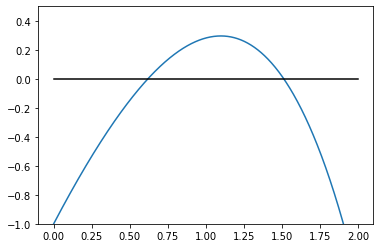

In [27]:
x = np.linspace(0,2,1000)
y = f(x)
plt.plot(x,y)
plt.plot(x, np.zeros((1000,)),'black')
plt.ylim(-1,0.5)
plt.show()

### Remember that the idea when doing newton's method is to replace $f(x)=0$ by a linear equation $L(x)=0$ where $L(x)$ is the linear approximation of $f(x)$ around our initial guess. Then we solve the linear equation $L(x)=0$ for x and that gives us our next guess. And then we iterate. 

### In this problem we are going to replace $f(x)=0$ by a quadratic equation $Q(x)=0$ where $Q(x)$ is the second order Taylor expansion of $f(x)$ around our initial guess (that is, $Q(x)$ is the parabola that best approximate $f(x)$ around our initial guess). Then we are going to solve $Q(x)=0$ and that's going to give us our next guess. And then we iterate.

### Two things can go wrong with this algorithm. 1) when we solve Q(x)=0,  there might not be any solution, in which case there is nothing we can do and the algorithm fails. 2) if there are solutions, typically we get two of them. So which one should we pick? Well, what makes sense is to pick the solution which is the closest to out current guess.

### Below I am showing the quadratic approximation of $f(x)$ at $x = 1.75$. Take the time to understand this piece of code.

In [28]:
def fprime(x):
    """
    derivative of f
    """
    y = 3-np.exp(x)
    return y

In [29]:
def fprimeprime(x):
    """
    second derivative of f
    """
    y = -np.exp(x)
    return y

In [30]:
def quad_approx(x_star, x):
    """
    quadratic approximation of f(x) at x_star
    """
    y = f(x_star) + fprime(x_star)*(x-x_star) + fprimeprime(x_star)*(x-x_star)**2/2
    return y

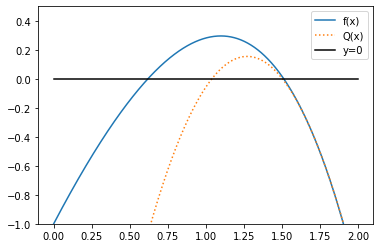

In [31]:
x_star = 1.75

x = np.linspace(0,2,1000)
y = f(x)
yquad = quad_approx(x_star,x)

plt.plot(x,y)
plt.plot(x,yquad,':')
plt.plot(x, np.zeros((1000,)),'black')
plt.legend(['f(x)','Q(x)','y=0'])
plt.ylim(-1,0.5)
plt.show()

### a) Implement this weird version of Newton's method where we use a quadratic approximation instead of a linear one. Note that the algorithm can fail if at some point the quadratic equation has no solution. In this case just print "FAIL!". Remember that at each iteration you need to choose the solution of Q(x)=0 which is the closest to the previous iterate.

Hint: To solve a quadratic like
$$
A (x-x_0)^2 + B(x-x_0) + C = 0
$$
start by setting $y = x-x_0$ then solve
$$
A y^2 + By + C = 0
$$
then let $x = x_0+y$.

In [32]:
def weird_newton(f, first_der, second_der, x0, num_iter):
    """
    Solve f(x)=0 using quadratic approximations
    INPUT:  f (function): function for which we solve f(x)=0
            first_der (function): first derivative of f(x)
            second_der (function): second derivative of f(x)
            x0 (float): initial guess
            num_iter: number of iterations
    OUTPUT: solution of f(x)=0
    """
    
    x = x0
    for i in range(0,num_iter):
        
        C = f(x)
        B = first_der(x)
        A = second_der(x)/2
        
        det = B**2 - 4*A*C
        
        if det<0:
            print('determinant negative!FAIL!')
            
        y1 = (-B + det**0.5)/(2*A)
        y2 = (-B - det**0.5)/(2*A)
        
        if np.abs(y1)<np.abs(y2):
            x = x+y1
        else:
            x = x+y2
            
        print(x)
        
    return x
        

### b) Use your algorithm to find the two solutions of $3x-e^x=0$. Use different initial guesses. For some initial guesses your algorithm should work, for some other it should fail.

In [33]:
def f(x):
    y = 3*x-np.exp(x)
    return y

In [34]:
def fprime(x):
    y = 3-np.exp(x)
    return y

In [35]:
def fprimeprime(x):
    y = -np.exp(x)
    return y

In [36]:
x0=0
weird_newton(f,fprime,fprimeprime, x0, 10)

0.5857864376269049
0.6190515623769764
0.6190612867359448
0.6190612867359451
0.6190612867359451
0.6190612867359451
0.6190612867359451
0.6190612867359451
0.6190612867359451
0.6190612867359451


0.6190612867359451

In [37]:
x0=1.8
weird_newton(f,fprime,fprimeprime, x0, 10)

1.494260384858873
1.5121373257051143
1.5121345516578426
1.5121345516578426
1.5121345516578426
1.5121345516578426
1.5121345516578426
1.5121345516578426
1.5121345516578426
1.5121345516578426


1.5121345516578426

In [38]:
x0=2
weird_newton(f,fprime,fprimeprime, x0, 10)

determinant negative!FAIL!
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


/Users/tlaurent/.local/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars
/Users/tlaurent/.local/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars


nan

# Problem 6 

### In this problem, we are going to use Newton's method to find the minimum of the function
### $$
f(x) = e^x + x^2
$$
### Note that we are NOT trying  to solve $e^x + x^2=0$. So we are using Newton's method for minimization, and not Newton's method for root finding.

### a) Plot f(x) on the interval \[-5,5\] and get a visual guess for the x-value of the minimum.

In [39]:
def f(x):
    y = np.exp(x) + x**2
    return y

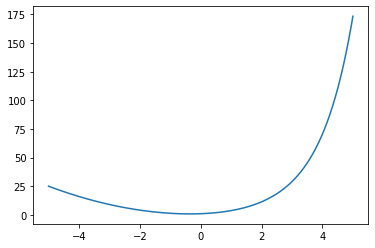

In [40]:
x = np.linspace(-5,5,1000)
y = f(x)
plt.plot(x,y)
#plt.ylim(-1,0.5)
plt.show()

### c) Use Newton's method to find the x-value of the minimum 

In [41]:
def newton_minimization(first_der, second_der, x0, num_iter):
    """
    find the minimum of f(x)  
    IMPUT:  first_der (function): first derivative of f(x)
            second_der (function): second derivative of f(x)
            x0 (float): initial guess
            num_iter: number of iterations
    OUTPUT: x-value of the minimum of f(x)
    """
    x = x0
    for i in range(0,num_iter):
        x = x - first_der(x)/second_der(x)
        print(x)
    return x

In [42]:
def fp(x):
    y = np.exp(x) + 2*x
    return y

In [43]:
def fpp(x):
    y = np.exp(x) + 2
    return y

In [44]:
x0 = 2
newton_minimization(fp, fpp, x0, 8)

0.7869860421615984
-0.11150056193795366
-0.34348946454172885
-0.35172483870686516
-0.3517337112389537
-0.35173371124919584
-0.35173371124919584
-0.35173371124919584


-0.35173371124919584

# Problem 7

### In this problem, we are going to use Newton's method to find the minimum of the function
### $$
f(x) = \frac{1}{x}+\log(x)
$$

### a) Plot $f(x)$ on the interval \[0.1,10\].

In [45]:
def f(x):
    y = 1/x + np.log(x)
    return y

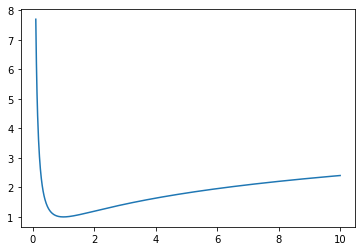

In [46]:
x = np.linspace(0.1,10,1000)
y = f(x)
plt.plot(x,y)
plt.show()

### b) find the x-value of the minimum with pen and paper (by solving $f'(x)=0$)

### c) Use Newton's method with initial guess 0.5. 

In [47]:
def fp(x):
    y = -1/x**2 + 1/x
    return y

In [48]:
def fpp(x):
    y = 2/x**3 - 1/x**2
    return y

In [49]:
x0 = 0.5
newton_minimization(fp, fpp, x0, 20)

0.6666666666666666
0.8333333333333333
0.9523809523809523
0.9956709956709956
0.9999626809971639
0.999999997214688
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


1.0

### d) Use Newton's method with initial guess 4. Something wrong should happen.

In [50]:
x0 = 4
newton_minimization(fp, fpp, x0, 20)

10.0
21.25
43.6038961038961
88.25586462858196
177.53491608635647
356.0812259173
713.168100256074
1427.3390127867697
2855.6794287484904
5712.35955834655
11425.719466933744
22852.439108941813
45705.87830540929
91412.75665457855
182826.51333103637
365654.0266730122
731309.053351494
1462619.1067057229
2925239.213412813
5850479.426826309


5850479.426826309

### e) Plot f(x) and its quadratic approximation around x=4 on the interval \[0.1,20\].
### Then Plot f(x) and its quadratic approximation around x=10 on the interval \[0.1,50\].
### Then try to understand why the algorithm was not working in the previous problem.

In [51]:
def quad_approx(x0, x):
    """
    quadratic approximation of f(x) at x_star
    """
    y = f(x0) + fp(x0)*(x-x0) + fpp(x0)*(x-x0)**2/2
    return y

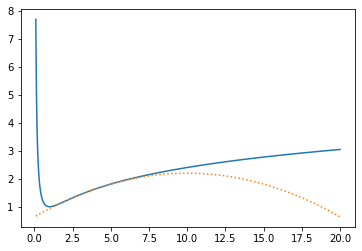

In [52]:
x0 = 4
x = np.linspace(0.1,20,1000)
y = f(x)
yq = quad_approx(x0, x)
plt.plot(x,y)
plt.plot(x,yq,":")
plt.show()

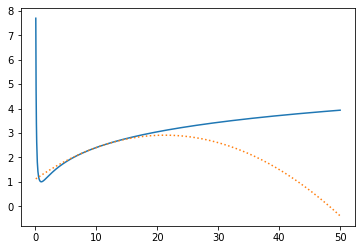

In [53]:
x0 = 10
x = np.linspace(0.1,50,1000)
y = f(x)
yq = quad_approx(x0, x)
plt.plot(x,y)
plt.plot(x,yq,":")
plt.show()

The problem is that the function is concave for these values of x. Therefore the quadratic approximations are upside-down parabolas: when we set the derivative equal to zero and solve for x we therefore get the max of the parabola! Not the min! This is bad! Newton's method for minimization need the function to be concave up to work.